In [147]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

%matplotlib inline

In [148]:
income = pd.read_csv('adult.csv')
income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [149]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [150]:
income.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [151]:
#Check for null values
income.isnull().sum().values.sum()

0

In [152]:
income_missing = pd.concat([(income=='?').sum(), 100 * (income=='?').mean()], axis=1)
income_missing.columns=['Count', '%']
income_missing.sort_values(by=['Count', '%'], ascending=False)

,Count,%
occupation,2809,5.751198
workclass,2799,5.730724
native-country,857,1.754637
age,0,0.000000
fnlwgt,0,0.000000
education,0,0.000000
educational-num,0,0.000000
marital-status,0,0.000000
relationship,0,0.000000
race,0,0.000000


In [153]:
income['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [154]:
income['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [155]:
income['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

([<matplotlib.axis.YTick at 0x1ab2be204c0>,
 [Text(0, 0, 'age'),
  Text(0, 1, 'fnlwgt'),
  Text(0, 2, 'educational-num'),
  Text(0, 3, 'capital-gain'),
  Text(0, 4, 'capital-loss'),
  Text(0, 5, 'hours-per-week')])

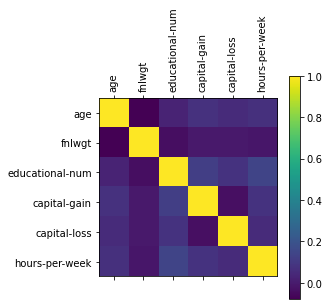

In [156]:
plt.matshow(income.corr())
plt.colorbar()
plt.xticks(np.arange(len(income.corr().columns)), income.corr().columns.values, rotation = 90) 
plt.yticks(np.arange(len(income.corr().columns)), income.corr().columns.values) 

In [157]:
income['Income_Above_or_Below_50K'] = income.apply(lambda row: 1 if '>50K' in row['income'] else 0, axis=1)

In [158]:
# Remove unwanted columns
income = income.drop(['fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'native-country', 'income'], axis=1)
income.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,Income_Above_or_Below_50K
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,1
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,1
4,18,?,Some-college,Never-married,?,Own-child,White,Female,30,0


In [126]:
one_hot_columns = ['workclass', 'education', 'marital-status','occupation', 'relationship', 'race', 'gender',
                   'hours-per-week']

one_hot_data = income[one_hot_columns].copy()
one_hot_data = pd.get_dummies(one_hot_data)
income_cleaned = one_hot_data.merge(income, left_index=True, right_index=True)

In [140]:
income_cleaned = income_cleaned.drop(['workclass', 'education', 'marital-status','occupation', 'relationship', 'race',
                                      'gender'], axis=1)
income_cleaned.columns

Index(['hours-per-week_x', 'workclass_?', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_10th',
       'education_11th', 'education_12th', 'education_1st-4th',
       'education_5th-6th', 'education_7th-8th', 'education_9th',
       'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repa